In [1]:
import pandas as pd

In [9]:
import pandas as pd
import chardet

with open('instadata.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Use the detected encoding to read the file
df = pd.read_csv('instadata.csv', encoding=result['encoding'])

print(df)


     Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follo

In [10]:
print(df.isnull().sum())

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


In [11]:
print(df.dtypes)


Impressions        int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Comments           int64
Shares             int64
Likes              int64
Profile Visits     int64
Follows            int64
Caption           object
Hashtags          object
dtype: object


In [12]:
print(df.describe())


        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.08

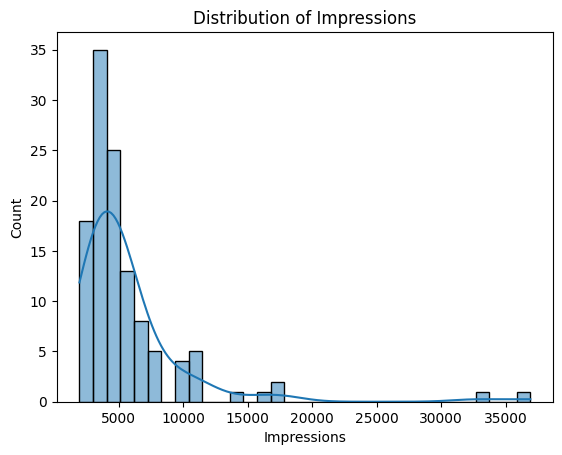

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Impressions'], kde=True)
plt.title('Distribution of Impressions')
plt.show()


In [18]:
df['Engagement_Rate'] = (df['Likes'] + df['Comments'] + df['Shares']) / df['Impressions']

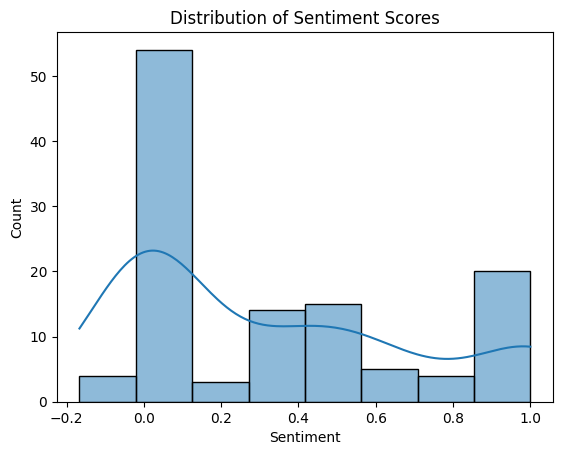

In [28]:
sns.histplot(df['Sentiment'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()


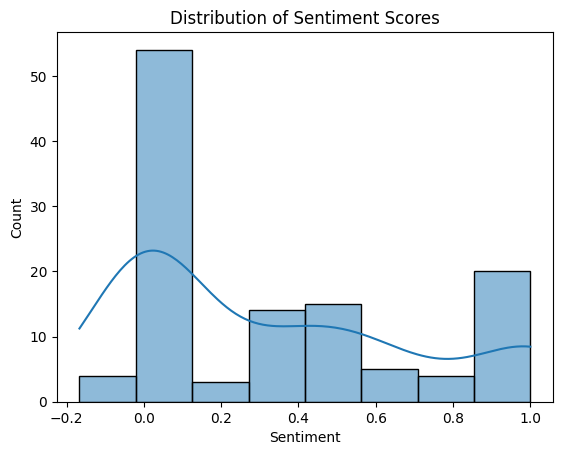

In [29]:
sns.histplot(df['Sentiment'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()


In [30]:
# Save the DataFrame with sentiment analysis
df.to_csv('cleaned_data_with_sentiment.csv', index=False)


In [31]:
df1=pd.read_csv("cleaned_data_with_sentiment.csv")
df1.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Engagement_Rate,Sentiment
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,0.044898,0.30
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,0.045421,0.55
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,0.035563,0.00
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,0.050795,0.00
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,0.052423,0.70


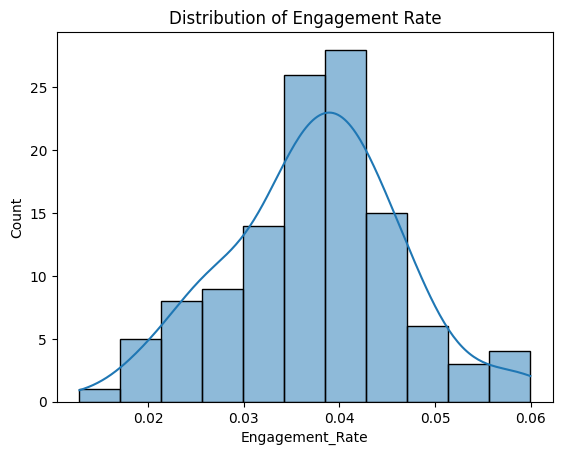

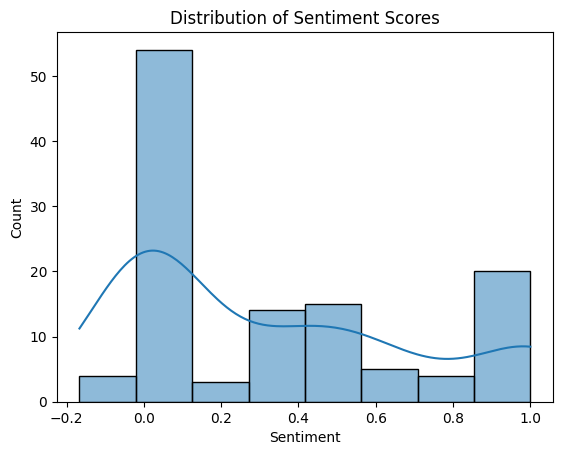

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Engagement Rate
sns.histplot(df['Engagement_Rate'], kde=True)
plt.title('Distribution of Engagement Rate')
plt.show()

# Histogram of Sentiment Scores
sns.histplot(df['Sentiment'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()


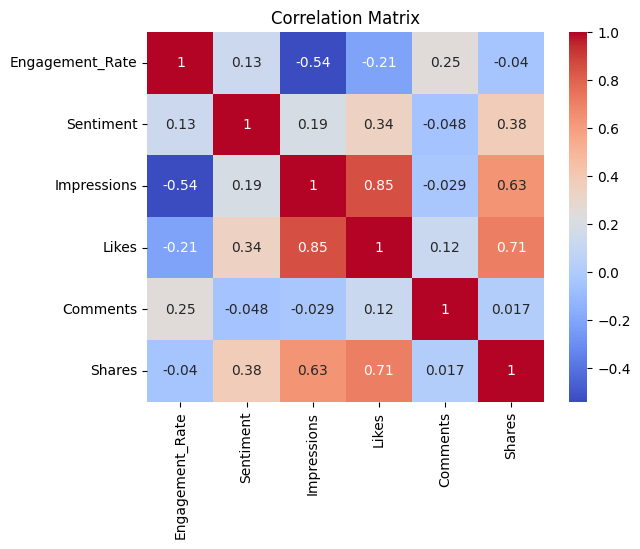

In [33]:
# Correlation matrix
corr = df[['Engagement_Rate', 'Sentiment', 'Impressions', 'Likes', 'Comments', 'Shares']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


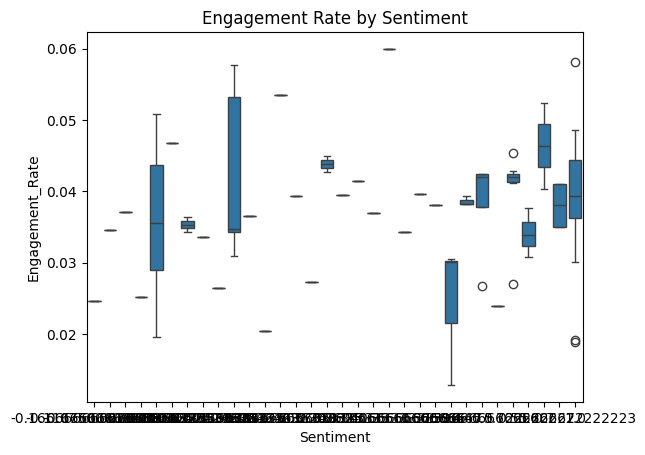

In [34]:
sns.boxplot(data=df, x='Sentiment', y='Engagement_Rate')
plt.title('Engagement Rate by Sentiment')
plt.show()


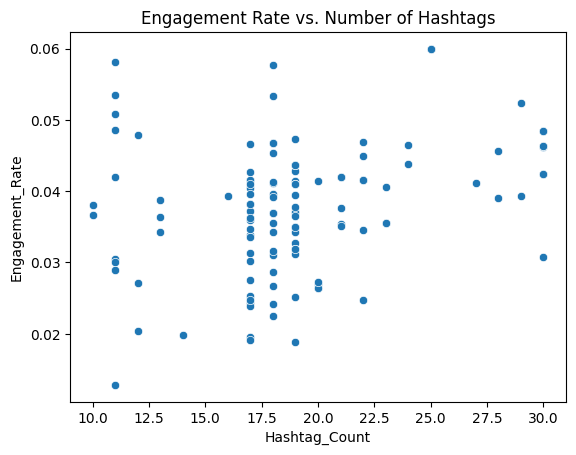

In [35]:
df['Hashtag_Count'] = df['Hashtags'].apply(lambda x: len(x.split('#')) - 1)  # Count hashtags

sns.scatterplot(data=df, x='Hashtag_Count', y='Engagement_Rate')
plt.title('Engagement Rate vs. Number of Hashtags')
plt.show()


In [37]:
# Save the updated DataFrame with new columns
df.to_csv('updated_cleaned_data.csv', index=False)
print("success")

success


In [38]:
# Save the DataFrame with the updated data
df.to_csv('updated_cleaned_data.csv', index=False)
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Engagement_Rate,Sentiment,Hashtag_Count
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,0.044898,0.30,22
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,0.045421,0.55,18
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,0.035563,0.00,18
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,0.050795,0.00,11
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,0.052423,0.70,29


In [39]:
required_columns = ['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other',
                    'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows',
                    'Caption', 'Hashtags', 'Engagement_Rate', 'Sentiment', 'Hashtag_Count']

# Check if all required columns are present
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present.")


All required columns are present.


In [43]:
# Save the DataFrame with the required columns
df.to_csv('updated_cleaned_data.csv', index=False)
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Engagement_Rate,Sentiment,Hashtag_Count
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,0.044898,0.30,22
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,0.045421,0.55,18
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,0.035563,0.00,18
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,0.050795,0.00,11
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,0.052423,0.70,29


In [45]:
import pandas as pd
import numpy as np
import datetime

# Load your data
df = pd.read_csv('updated_cleaned_data.csv')

# Create a synthetic 'Time' column with sequential dates
# Start date for your dataset
start_date = datetime.datetime(2023, 1, 1)

# Generate dates, assuming daily frequency
df['Time'] = [start_date + datetime.timedelta(days=i) for i in range(len(df))]

# Save the updated DataFrame
df.to_csv('updated_with_time.csv', index=False)

# Display the DataFrame to confirm
print(df.head())


   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [46]:
import pandas as pd
import numpy as np
import datetime

# Load your data
df = pd.read_csv('updated_cleaned_data.csv')

# Create a synthetic 'Time' column with sequential dates
# Start date for your dataset
start_date = datetime.datetime(2023, 1, 1)

# Generate dates, assuming daily frequency
df['Time'] = [start_date + datetime.timedelta(days=i) for i in range(len(df))]

# Save the updated DataFrame
df.to_csv('updated_with_time.csv', index=False)

# Display the DataFrame to confirm
print(df.head())


   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [47]:
import pandas as pd

# Load your data
df = pd.read_csv('updated_cleaned_data.csv')

# Create a synthetic 'Time' column with sequential integers
df['Time'] = range(1, len(df) + 1)

# Save the updated DataFrame
df.to_csv('updated_with_time.csv', index=False)

# Display the DataFrame to confirm
print(df.head())


   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

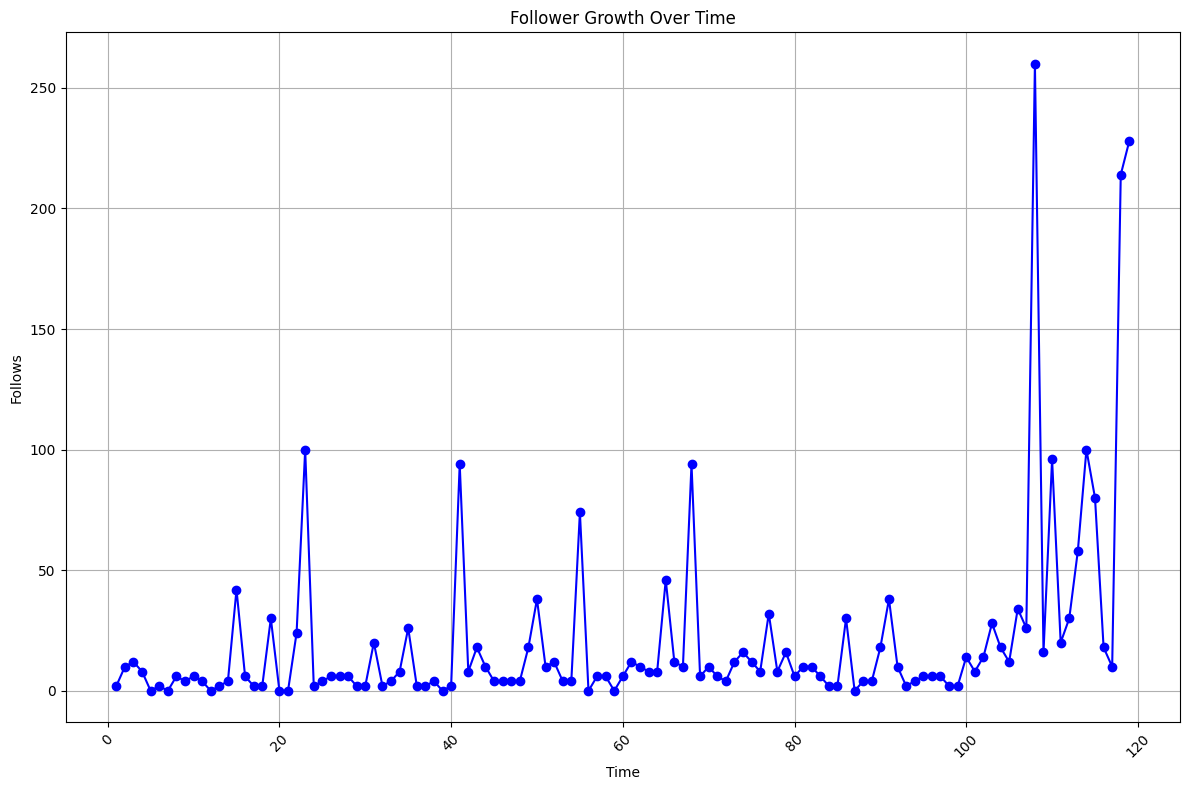

In [48]:
import matplotlib.pyplot as plt

# Load the updated DataFrame
df = pd.read_csv('updated_with_time.csv')

# Plot follower growth over time
plt.figure(figsize=(12, 8))
plt.plot(df['Time'], df['Follows'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('Follows')
plt.title('Follower Growth Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
df.to_csv('updated_with_time.csv', index=False)

# Display the DataFrame to confirm
print(df.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni